In [1]:
import pandas as pd

df = pd.read_csv('MSFT.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-05-04,306.239990,307.760010,303.399994,305.410004,302.923828,22519900
1,2023-05-05,305.720001,311.970001,304.269989,310.649994,308.121124,28181200
2,2023-05-08,310.130005,310.200012,306.089996,308.649994,306.137451,21318600
3,2023-05-09,308.000000,310.040009,306.309998,307.000000,304.500854,21340800
4,2023-05-10,308.619995,313.000000,307.670013,312.309998,309.767609,30078000
...,...,...,...,...,...,...,...
247,2024-04-29,405.250000,406.320007,399.190002,402.250000,402.250000,19582100
248,2024-04-30,401.489990,402.160004,389.170013,389.329987,389.329987,28781400
249,2024-05-01,392.609985,401.720001,390.309998,394.940002,394.940002,23562500
250,2024-05-02,397.660004,399.929993,394.649994,397.839996,397.839996,17709400


In [2]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2023-05-04,305.410004
1,2023-05-05,310.649994
2,2023-05-08,308.649994
3,2023-05-09,307.000000
4,2023-05-10,312.309998
...,...,...
247,2024-04-29,402.250000
248,2024-04-30,389.329987
249,2024-05-01,394.940002
250,2024-05-02,397.839996


In [3]:
df['Date']

0      2023-05-04
1      2023-05-05
2      2023-05-08
3      2023-05-09
4      2023-05-10
          ...    
247    2024-04-29
248    2024-04-30
249    2024-05-01
250    2024-05-02
251    2024-05-03
Name: Date, Length: 252, dtype: object

In [4]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [5]:
df

,Date,Close
0,2023-05-04,305.410004
1,2023-05-05,310.649994
2,2023-05-08,308.649994
3,2023-05-09,307.000000
4,2023-05-10,312.309998
...,...,...
247,2024-04-29,402.250000
248,2024-04-30,389.329987
249,2024-05-01,394.940002
250,2024-05-02,397.839996


In [6]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

C:\Users\samar\AppData\Local\Temp\ipykernel_16820\2565755782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0     2023-05-04
1     2023-05-05
2     2023-05-08
3     2023-05-09
4     2023-05-10
         ...    
247   2024-04-29
248   2024-04-30
249   2024-05-01
250   2024-05-02
251   2024-05-03
Name: Date, Length: 252, dtype: datetime64[ns]

In [7]:
df.index = df.pop('Date')
df

,Close
Date,
2023-05-04,305.410004
2023-05-05,310.649994
2023-05-08,308.649994
2023-05-09,307.000000
2023-05-10,312.309998
...,...
2024-04-29,402.250000
2024-04-30,389.329987
2024-05-01,394.940002


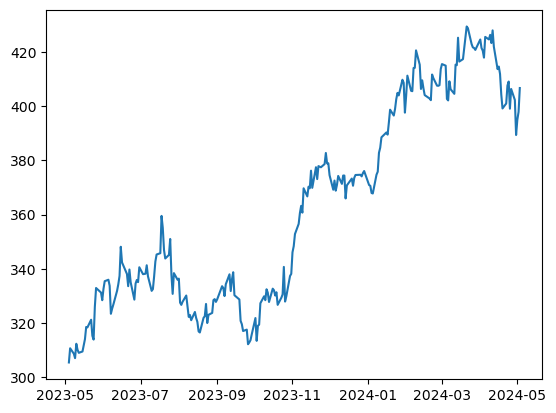

In [8]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [9]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=1):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2024-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2024-03-25', 
                                '2024-05-3', 
                                n=1)
windowed_df

,Target Date,Target-1,Target
0,2024-03-25,428.739990,422.859985
1,2024-03-26,422.859985,421.649994
2,2024-03-27,421.649994,421.429993
3,2024-03-28,421.429993,420.720001
4,2024-04-01,420.720001,424.570007
5,2024-04-02,424.570007,421.440002
6,2024-04-03,421.440002,420.450012
7,2024-04-04,420.450012,417.880005
8,2024-04-05,417.880005,425.519989
9,2024-04-08,425.519989,424.589996


In [11]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((29,), (29, 1, 1), (29,))

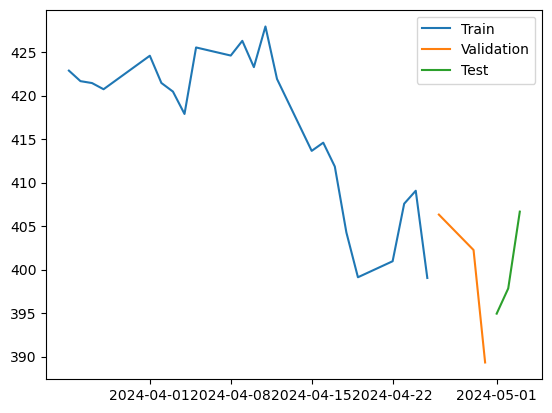

In [12]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 173501.2031 - mean_absolute_error: 416.4392 - val_loss: 159357.2031 - val_mean_absolute_error: 399.1300
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 173447.6562 - mean_absolute_error: 416.3749 - val_loss: 159312.9219 - val_mean_absolute_error: 399.0745
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 173401.3594 - mean_absolute_error: 416.3193 - val_loss: 159269.9531 - val_mean_absolute_error: 399.0207
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 173356.5156 - mean_absolute_error: 416.2654 - val_loss: 159228.2969 - val_mean_absolute_error: 398.9684
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 173313.5156 - mean_absolute_error: 416.2138 - val_loss: 159186.9844 - val_mean_absolute_error: 398.9167
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 173270.1562 - mean_absolute_error: 416.1617 - val_loss: 159146.7031 - val_mean_absolute_error: 398.8662
Epoch 7/100
1/1 ━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


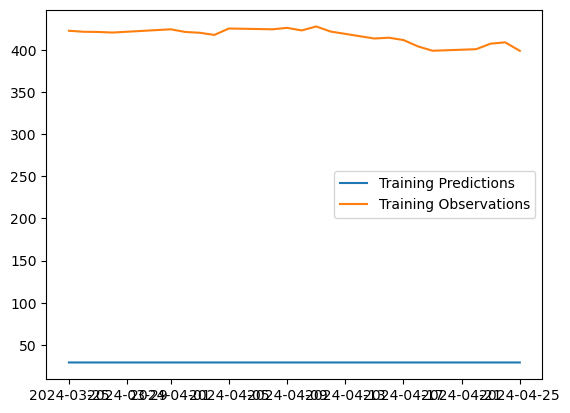

In [14]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


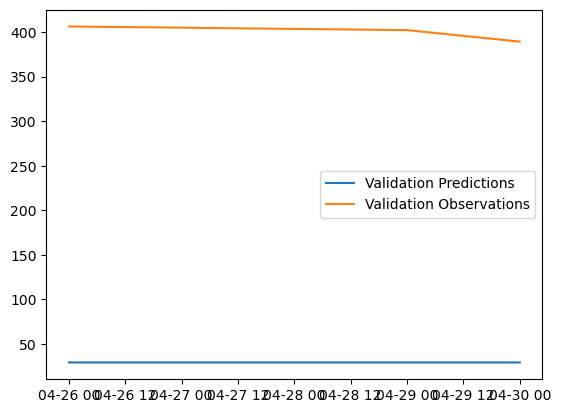

In [17]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


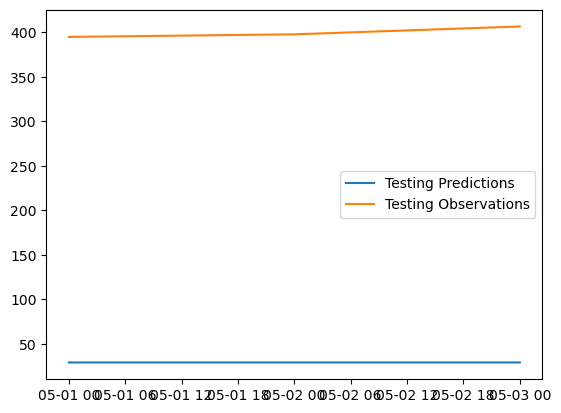

In [18]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


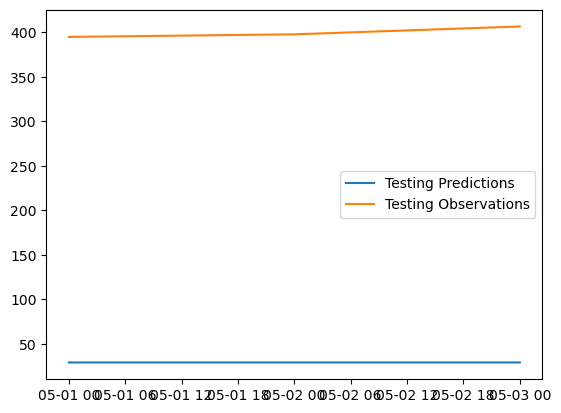

In [19]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])


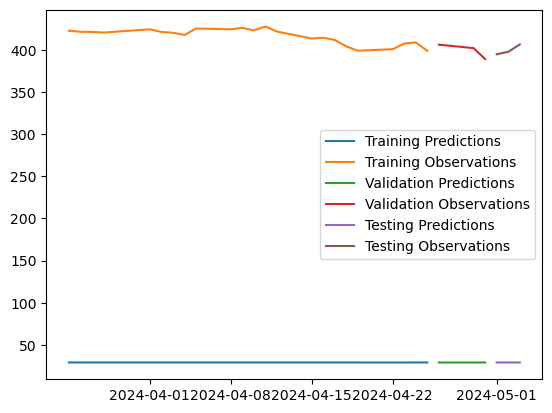

In [20]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [21]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


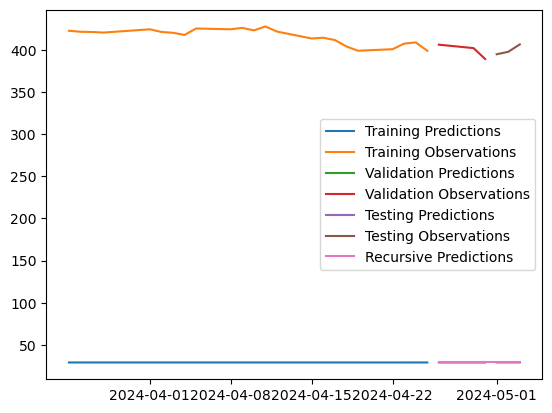

In [22]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])